# Titanic survived Project
## Project Description
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

Dataset Link-
https://github.com/dsrscientist/dataset1/blob/master/titanic_train.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score

import joblib

import warnings
warnings.filterwarnings('ignore')


In [2]:
df =pd.read_csv('titanic_train.csv')
df

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


here 0 means dead and 1 means survived.



1:'first_class',2:'economy_class',3:'lower_class'


parch: The dataset defines family relations in this way.
Some children travelled only with a nanny, therefore parch=0 for them.

Embarked
Embarked implies where the traveler mounted from. 
There are three possible values for Embark — Southampton, Cherbourg, and Queenstown. 

sibsp= Number of Siblings/Spouses Aboard

 check whetaher null value present in he dataset

In [3]:
df.shape

(891, 13)

In [4]:
df.columns.tolist()

['Unnamed: 0',
 'PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [5]:
df.dtypes

Unnamed: 0       int64
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

5 integer datatype
4 object datatype
2 float datatype


check all the null values present in the dataset

In [6]:
df.isnull().sum().sum()

866

total 891 and actually 866 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   PassengerId  891 non-null    int64  
 2   Survived     891 non-null    int64  
 3   Pclass       891 non-null    int64  
 4   Name         891 non-null    object 
 5   Sex          891 non-null    object 
 6   Age          714 non-null    float64
 7   SibSp        891 non-null    int64  
 8   Parch        891 non-null    int64  
 9   Ticket       891 non-null    object 
 10  Fare         891 non-null    float64
 11  Cabin        204 non-null    object 
 12  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


only age ,cabin and embarked have the null values

<AxesSubplot:>

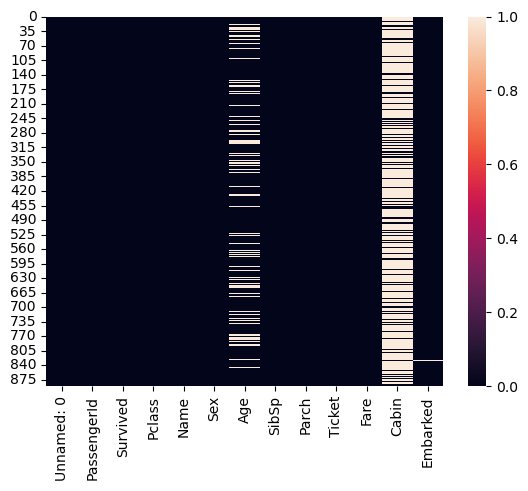

In [8]:
import seaborn as sns
sns.heatmap(df.isnull())

we clearly observe that cabin has more null value and it ha sno us efor our dataset..bacause thare is many cabin in the ship.
we need  age column \also passenger id it just a number we also drop that column

In [9]:
df.drop(['Unnamed: 0','PassengerId','Cabin','Name','Ticket'],axis = 1, inplace = True)

In [10]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [12]:
df['Age']= df['Age'].replace(0,df['Age'].mean())

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [14]:
df["Age"].isnull().sum()

177

In [15]:
a = np.mean(df['Age'])

In [16]:
np.ceil(a)

30.0

In [17]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [18]:
print(df['Embarked'].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


we can see here emarked have 3 columns C, S and Q and it is an object datatype.
WE HAVE TO CONVERT THIS INTO INTEGER.

In [19]:
df['Embarked'].replace(['C','Q','S'],[1,2,3],inplace=True)

In [20]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,3.0
1,1,1,female,38.0,1,0,71.2833,1.0


In [21]:
df['Embarked']= df['Embarked'].fillna(df['Embarked'].mode())

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    float64
dtypes: float64(3), int64(4), object(1)
memory usage: 55.8+ KB


In [23]:
df['Embarked'].unique()

array([ 3.,  1.,  2., nan])

In [24]:
df['Embarked']=df['Embarked'].fillna(3)

In [25]:
df['Embarked'].unique()

array([3., 1., 2.])

now we have fill all the null value now our data is without a null value.

<AxesSubplot:>

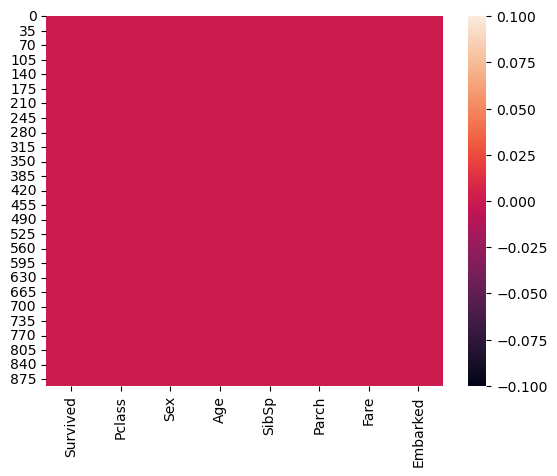

In [26]:
sns.heatmap(df.isnull())

In [27]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,2.536476
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.791503
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,2.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,3.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,3.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,3.000000


1.we notce that in p class mean < median means it is left skewed.
2. there is no skewed in Age
3.in fare mean > median means it is right skewed.


In [28]:
df['Survived'].unique()

array([0, 1], dtype=int64)

# DATA VISUALIZATION

0    549
1    342
Name: Survived, dtype: int64


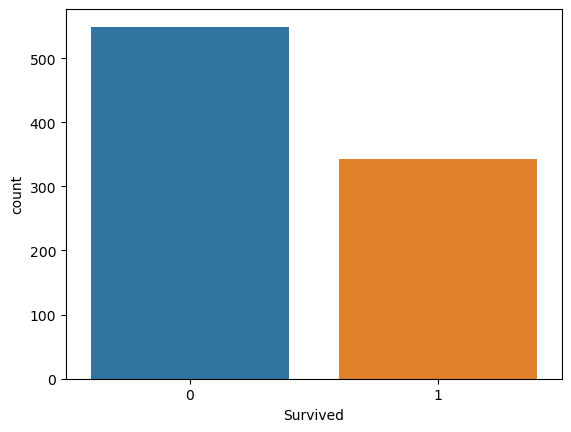

In [29]:
ax = sns.countplot(x = 'Survived', data = df)
print(df['Survived'].value_counts())

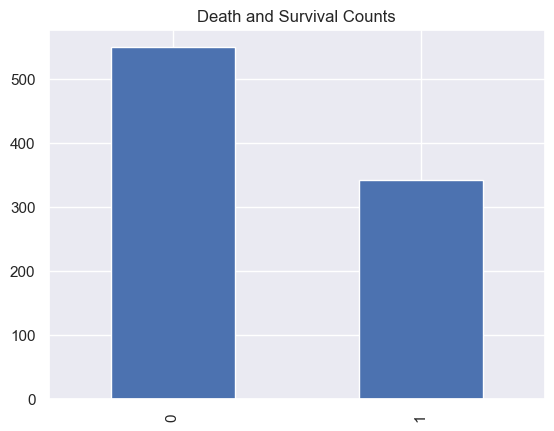

In [64]:
df['Survived'].value_counts().plot(kind='bar', title='Death and Survival Counts',stacked  = True, grid=True)
plt.show()

male      577
female    314
Name: Sex, dtype: int64


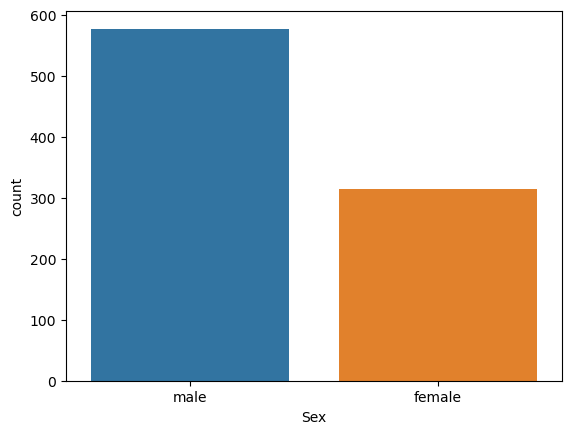

In [31]:
ax = sns.countplot(x = 'Sex', data = df)
print(df['Sex'].value_counts())

In [55]:
dead_survived_count = pd.crosstab(df['Survived'],df['Sex'],margins = True)
dead_survived_count

Sex,female,male,All
Survived,,,
0,81,468,549
1,233,109,342
All,314,577,891


we using fuction for the chart

In [33]:
import matplotlib.pyplot as plt # Plot the graphes
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

In [35]:
import warnings
warnings.filterwarnings('ignore')

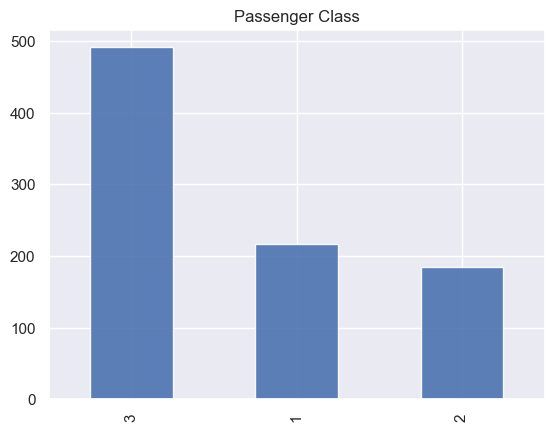

In [38]:
df['Pclass'].value_counts().plot(kind='bar', title='Passenger Class',alpha=0.90,grid=True)
plt.show()

df['Pclass'].value_counts().plot(kind = 'bar', title = 'Passemger class', alpha= 0.90, grid = True)

3    491
1    216
2    184
Name: Pclass, dtype: int64


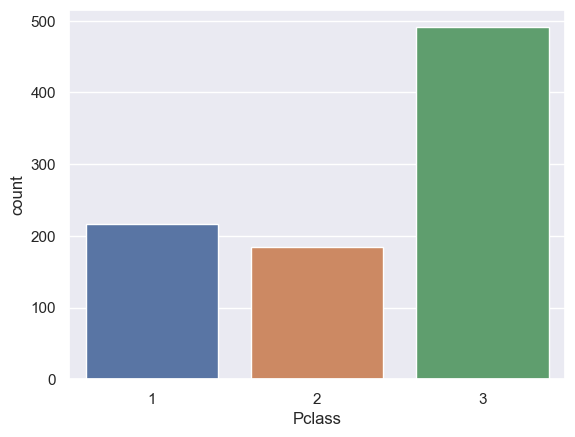

In [41]:
ax = sns.countplot(x = 'Pclass', data = df)
print(df['Pclass'].value_counts())

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: Age, Length: 89, dtype: int64


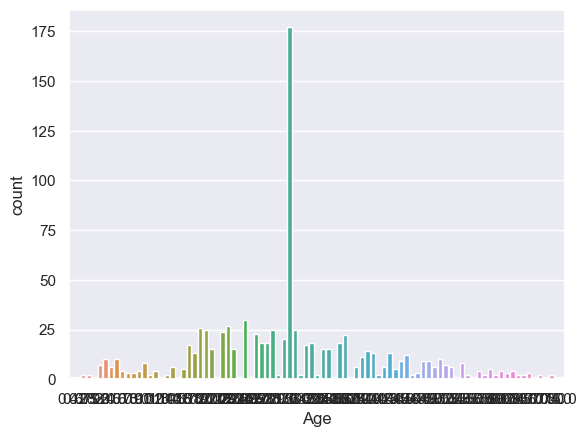

In [42]:
ax = sns.countplot(x = 'Age', data = df)
print(df['Age'].value_counts())

we cannot make any sense we have to plot another graph.

<AxesSubplot:title={'center':'Age'}, ylabel='Frequency'>

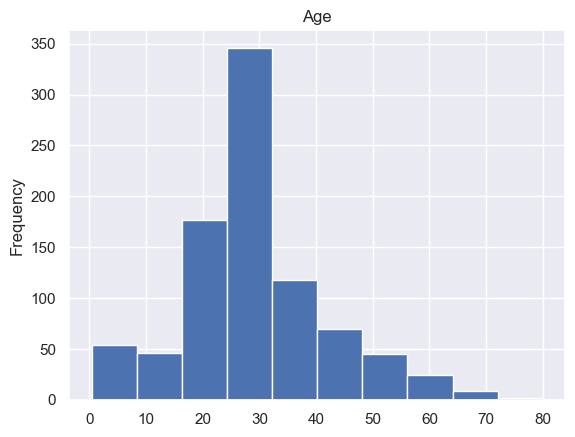

In [43]:
df ['Age'].plot(kind = 'hist',title = 'Age', grid = True)

now we can clearly see that age range is come mostlty from 20-40.more younger generation had treavaled from that ship. 







now we have to plot some graph here which show the relation betwwen the other feature with the label or target variable.

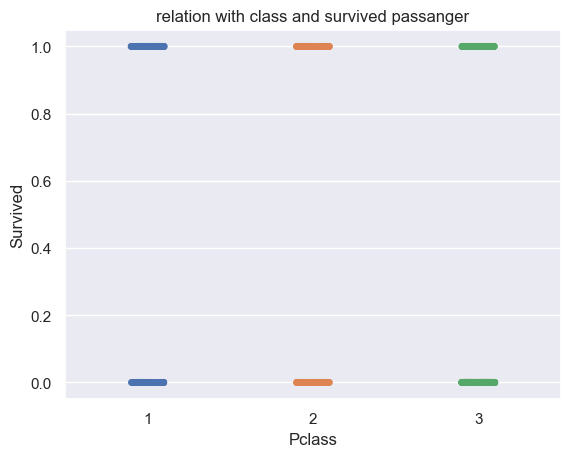

In [45]:
plt.title("relation with class and survived passanger")
sns.stripplot(x= 'Pclass',y= 'Survived', data = df)
plt.show()

In [ ]:
rel_1=pd.crosstab(df['Pclass'],df['Survived'])
rel_1_normalize = rel_1.div(rel_1.sum(1).astype(float), axis=0)
rel_1_normalize.plot(kind='bar',title='Survival Rate by Passenger Classes',stacked=True,grid=True)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

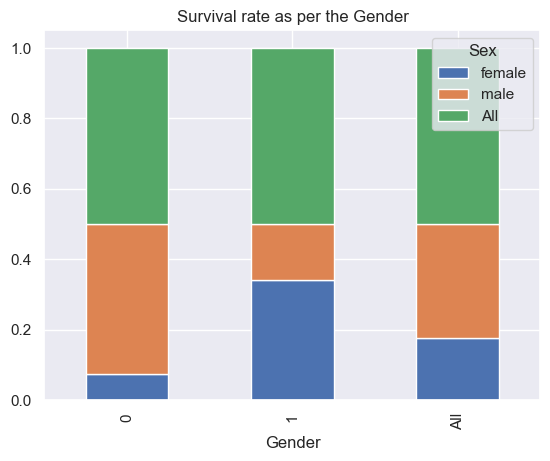

In [53]:
dead_survived_count = pd.crosstab(df['Survived'],df['Sex'],margins = True)
dead_survived_count = dead_survived_count.div(dead_survived_count.sum(1).astype(float), axis=0)
dead_survived_count.plot(kind = 'bar', title = 'Survival rate as per the Gender',stacked=True, grid = True)
plt.xlabel('Gender')
plt.show()


beacuse we have taking margins =  true that this graph shows like this.

In [56]:
surbysex = pd.crosstab(df['Survived'],df['Sex'])
surbysex

Sex,female,male
Survived,,
0,81,468
1,233,109


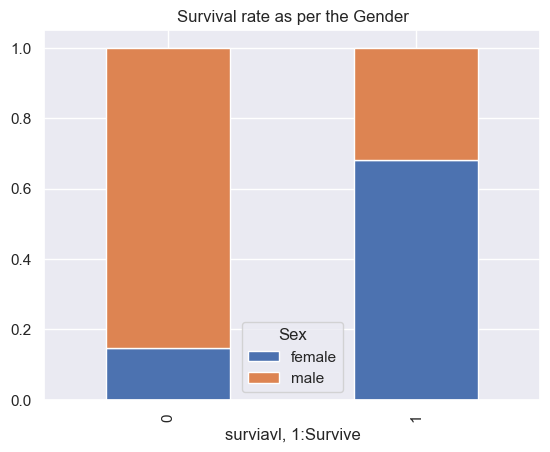

In [66]:
surbysex = surbysex.div(surbysex.sum(1).astype(float), axis=0)
surbysex.plot(kind = 'bar', title = 'Survival rate as per the Gender',stacked=True, grid = True)
plt.xlabel('surviavl, 1:Survive')
plt.show()

plot shows majority of females survived.

In [65]:
sexbysur = pd.crosstab(df['Sex'],df['Survived'])
sexbysur

Survived,0,1
Sex,,
female,81,233
male,468,109


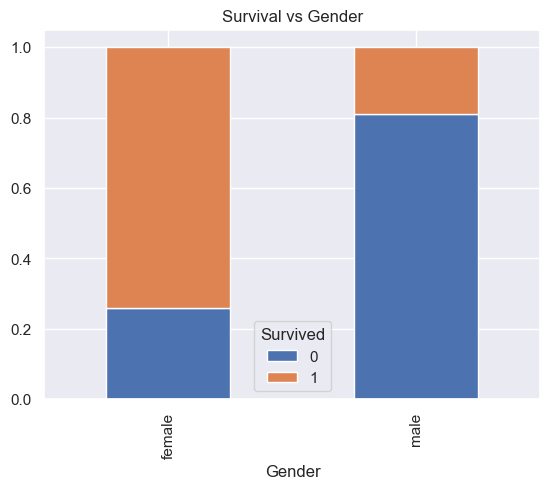

In [67]:
sexbysur = sexbysur.div(sexbysur.sum(1).astype(float), axis=0)
sexbysur.plot(kind = 'bar', title = 'Survival vs Gender',stacked=True, grid = True)
plt.xlabel('Gender')
plt.show()

females survival rate is much high than males.

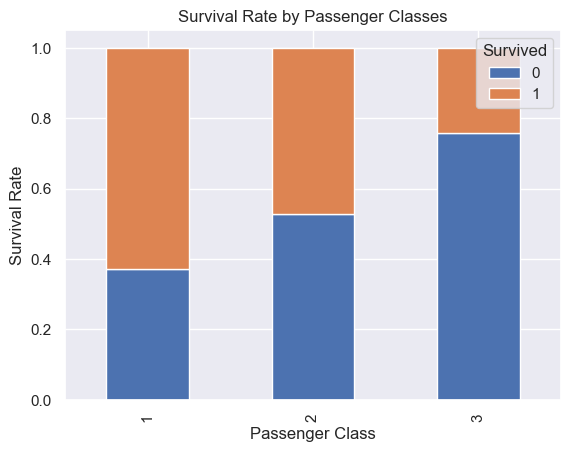

In [63]:
clansur=pd.crosstab(df['Pclass'],df['Survived'])
clansur = clansur.div(clansur.sum(1).astype(float), axis=0)
clansur.plot(kind='bar',title='Survival Rate by Passenger Classes',stacked=True,grid=True)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

class 3 passenger have more survived than other two classes 1 and 2 respectively.

now lets see passenger classwise male and  female serviaval graph.

In [69]:
# Get the unique values of Pclass:
passenger_classes = sorted(df['Pclass'].unique())
passenger_classes

[1, 2, 3]

In [72]:
for i in passenger_classes:
    print('MALE: ', i, len(df[(df['Sex']== 'male') & (df['Pclass'] ==i )]))
    print('FEMALE: ', i, len(df[(df['Sex'] == 'female') & (df['Pclass'] == i)]))
    
male  = df[df['Sex']=='male']
female  =df[df['Sex']== 'female']

MALE:  1 122
FEMALE:  1 94
MALE:  2 108
FEMALE:  2 76
MALE:  3 347
FEMALE:  3 144


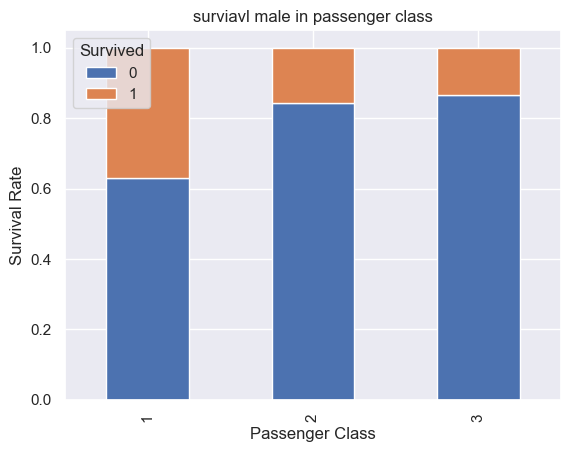

Text(0, 0.5, 'Survival Rate')

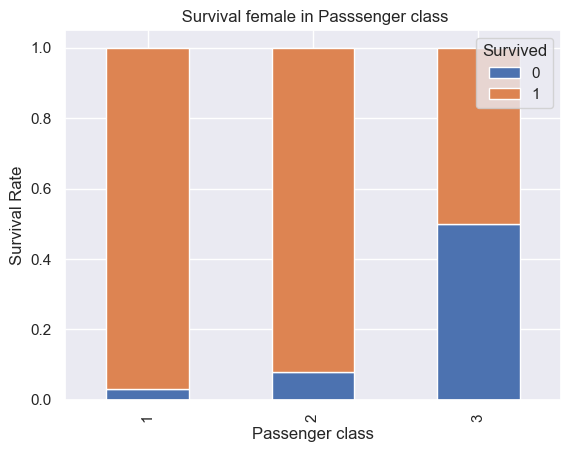

In [75]:
male_1 = pd.crosstab(male['Pclass'],male['Survived'])
male_1 = male_1.div(male_1.sum(1).astype(float) ,axis = 0)
male_1.plot(kind = 'bar', title  = 'surviavl male in passenger class', stacked = True, grid = True)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

female_1 = pd.crosstab(female['Pclass'], female['Survived'])
female_1 = female_1.div(female_1.sum(1).astype(float),axis = 0)
female_1.plot(kind = 'bar', title = ' Survival female in Passsenger class', stacked = True, grid = True)
plt.xlabel('Passenger class')
plt.ylabel('Survival Rate')

class 1 has more servival rate in both female and male graph. 
class 2 female has also have high servival rate

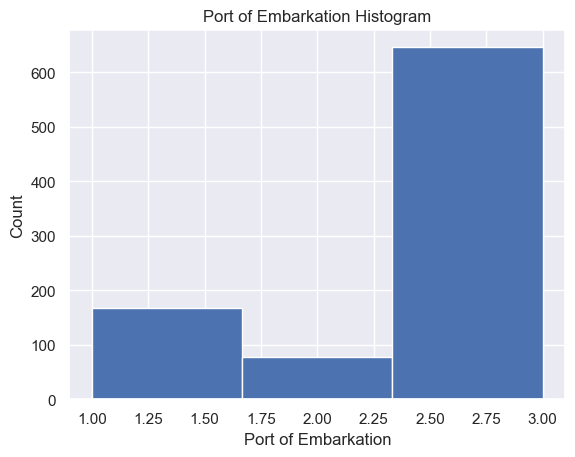

In [78]:
df['Embarked'].plot(kind='hist',bins=3,range=(1,3),grid='True')
plt.title('Port of Embarkation Histogram')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.show()

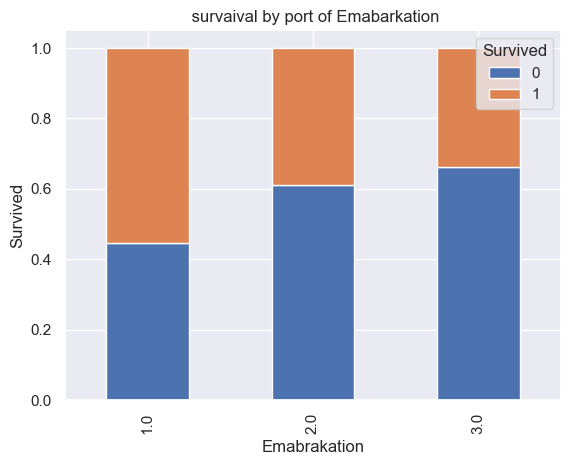

In [79]:
em = pd.crosstab(df['Embarked'], df['Survived'])
em_1 = em.div(em.sum(1).astype(float), axis = 0)
em_1.plot(kind = 'bar', title  = ' survaival by port of Emabarkation', grid =' True', stacked = 'True')
plt.xlabel('Emabrakation')
plt.ylabel('Survived')
plt.show()


 the passenger mounted from  who port 1 Cherbourg has more survaival rate then other 2 ports




we konw from the dataset the parch and sibsp is related to the human realtion with each other.
so here
We define a new feature FamilySize that is
the sum of Parch (number of parents or children on board) and SibSp (number of siblings or spouses):

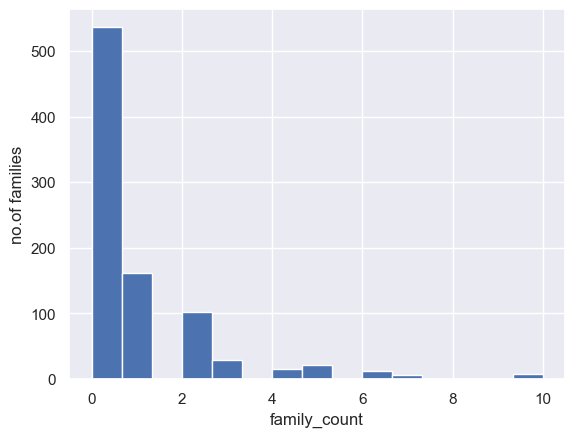

In [80]:
df['family_member'] = df['SibSp'] + df['Parch']
df['family_member'].hist(bins=15)
plt.xlabel('family_count')
plt.ylabel('no.of families')
plt.show()

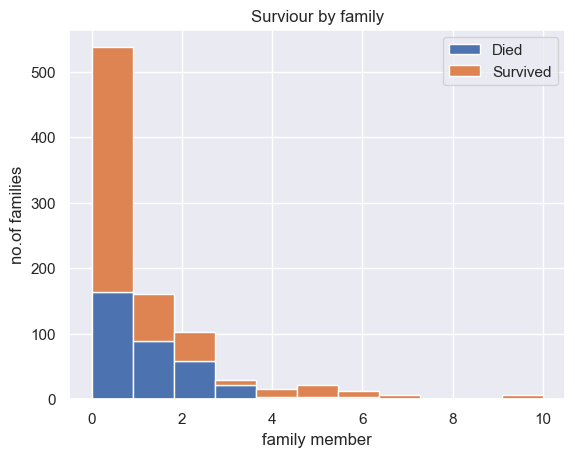

In [86]:
family_member = sorted(df['family_member'].unique())
family_member_max = max(family_member)
family_member_sur = df[df['Survived']==1]['family_member']
family_member_not_sur = df[df['Survived']==0]['family_member']

plt.hist([family_member_sur,family_member_not_sur],bins = family_member_max+1, range=(0,family_member_max),stacked = True)
plt.legend(('Died', 'Survived'),loc = 'best')
plt.xlabel('family member')
plt.ylabel('no.of families')
plt.title('Surviour by family')
plt.show()

the familymember has less number of member has survived more as compared with the who has 4 and 6 memebr of people.

In [93]:
df['Sex'].replace(['male','female'],[0,1],inplace = True)

In [87]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family_member
0,0,3,male,22.0,1,0,7.2500,3.0,1
1,1,1,female,38.0,1,0,71.2833,1.0,1
2,1,3,female,26.0,0,0,7.9250,3.0,0
3,1,1,female,35.0,1,0,53.1000,3.0,1
4,0,3,male,35.0,0,0,8.0500,3.0,0


we have to drop Parch and SibSp table 

In [88]:
df.drop(['SibSp', 'Parch'], axis= 1, inplace = True)

In [94]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,family_member
0,0,3,0,22.0,7.2500,3.0,1
1,1,1,1,38.0,71.2833,1.0,1
2,1,3,1,26.0,7.9250,3.0,0
3,1,1,1,35.0,53.1000,3.0,1
4,0,3,0,35.0,8.0500,3.0,0


In [91]:
df.shape

(891, 7)

In [1]:
plt.figure(figsize=(20,25))
p=1

for i in df:
    if p <= 9:
        ax= plt.subplot(3,3,p)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize = 20)
        
        p +=1
    plt.show()

NameError: name 'plt' is not defined

In [103]:
df.skew()

Survived         0.478523
Pclass          -0.630548
Sex              0.618921
Age              0.434488
Fare             4.787317
Embarked        -1.264823
family_member    2.727441
dtype: float64

In [104]:
df['Fare']= np.cbrt(df['Fare'])

In [105]:
df.skew()

Survived         0.478523
Pclass          -0.630548
Sex              0.618921
Age              0.434488
Fare             1.230382
Embarked        -1.264823
family_member    2.727441
dtype: float64

In [106]:
corr = df.corr()
corr

,Survived,Pclass,Sex,Age,Fare,Embarked,family_member
Survived,1.000000,-0.338481,0.543351,-0.069809,0.322398,-0.167675,0.016639
Pclass,-0.338481,1.000000,-0.131900,-0.331339,-0.656224,0.162098,0.065997
Sex,0.543351,-0.131900,1.000000,-0.084153,0.251434,-0.108262,0.200988
Age,-0.069809,-0.331339,-0.084153,1.000000,0.105195,-0.026749,-0.248512
Fare,0.322398,-0.656224,0.251434,0.105195,1.000000,-0.220735,0.347390
Embarked,-0.167675,0.162098,-0.108262,-0.026749,-0.220735,1.000000,0.066516
family_member,0.016639,0.065997,0.200988,-0.248512,0.347390,0.066516,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

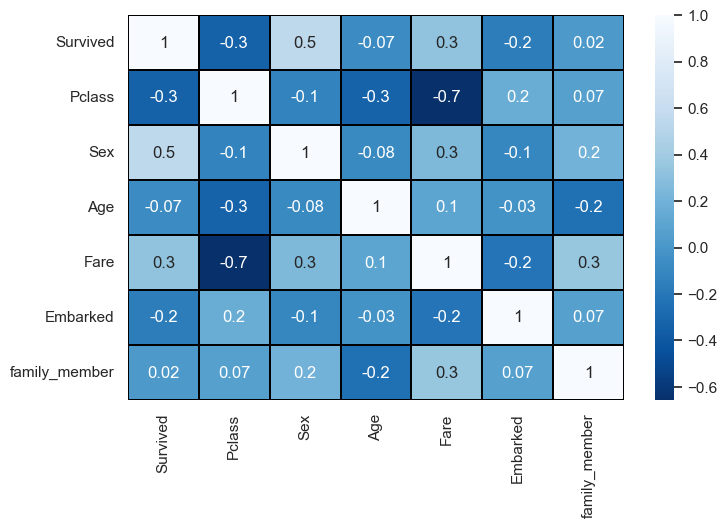

In [112]:
plt.figure(figsize= (8,5))
sns.heatmap(df.corr(), linewidths = 0.1, fmt = "0.1g", linecolor = 'black', annot = True, cmap = "Blues_r")
plt.yticks(rotation = 0);
plt.show

pclass has major relation with the fare
age  and sex have strong relation with the family member

In [117]:
df.corr['Survived']

TypeError: 'method' object is not subscriptable

In [118]:
df1_corr=df.corr()
df1_corr['Survived']

Survived         1.000000
Pclass          -0.338481
Sex              0.543351
Age             -0.069809
Fare             0.322398
Embarked        -0.167675
family_member    0.016639
Name: Survived, dtype: float64

# Dividing the data into x aand y¶
label and features

In [120]:
x= df.drop('Survived', axis = 1)
y = df['Survived']
x.shape, y.shape

((891, 6), (891,))

In [121]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,Pclass,Sex,Age,Fare,Embarked,family_member
0,0.827377,-0.737695,-0.592481,-0.774708,0.585954,0.059160
1,-1.566107,1.355574,0.638789,1.287903,-1.942303,0.059160
2,0.827377,1.355574,-0.284663,-0.720325,0.585954,-0.560975
3,-1.566107,1.355574,0.407926,0.926230,0.585954,0.059160
4,0.827377,-0.737695,0.407926,-0.710596,0.585954,-0.560975
...,...,...,...,...,...,...
886,-0.369365,-0.737695,-0.207709,-0.386703,0.585954,-0.560975
887,-1.566107,1.355574,-0.823344,0.318502,0.585954,-0.560975
888,0.827377,1.355574,0.000000,0.089990,0.585954,1.299429
889,-1.566107,-0.737695,-0.284663,0.318502,-1.942303,-0.560975


In [122]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif =  pd.DataFrame()
vif["vif values"] = [variance_inflation_factor(x.values,i)
                   for i in range(len(x.columns))]
vif["Features"] = x.columns

In [123]:
vif

,vif values,Features
0,2.278015,Pclass
1,1.098741,Sex
2,1.204252,Age
3,2.553238,Fare
4,1.087449,Embarked
5,1.483176,family_member


vif values are great.
if value 1 -> it s not correalted with the remaining coloumn if value 12--> it is 12 times corelate with remianing features 
when there was no coliinerarity here vif threshold value is 5 but sometimes it is considered as 10 lets remove the feature
which have high threshold value

In [128]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits= 5,shuffle = True, random_state = 0)

In [130]:
clf  = KNeighborsClassifier(n_neighbors = 6)
scoring = 'accuracy'
score = cross_val_score(clf,x,y, cv = kfold, n_jobs=1, scoring= scoring)
print(score)

[0.80446927 0.7752809  0.84269663 0.79775281 0.7752809 ]


In [132]:
#learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
clf = [KNeighborsClassifier(n_neighbors = 5),DecisionTreeClassifier(),
       RandomForestClassifier(n_estimators=5),GaussianNB(),SVC(),ExtraTreesClassifier(),
      GradientBoostingClassifier(n_estimators=5, learning_rate=1,max_features=3, max_depth =3, random_state = 42),
       AdaBoostClassifier(),ExtraTreesClassifier()]
def model_fit():
    scoring = 'accuracy'
    for i in range(len(clf)):
        score = cross_val_score(clf[i] ,x,y, cv = kfold , n_jobs=1, scoring=scoring)
        print("Score of Model",i,":",round(np.mean(score)*100,2))
#     round(np.mean(score)*100,2)
#     print("Score of :\n",score)
model_fit()

Score of Model 0 : 80.58
Score of Model 1 : 78.34
Score of Model 2 : 79.57
Score of Model 3 : 78.45
Score of Model 4 : 81.71
Score of Model 5 : 79.35
Score of Model 6 : 80.92
Score of Model 7 : 80.02
Score of Model 8 : 79.57


In [ ]:
svc is our best machine learnng model.
but still we need to improve its accuracy by doing hyper parameter.

In [134]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state = 42)

In [136]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.688 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.688 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.704 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.710 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.752 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.872 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.752 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.790 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.823 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.696 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [137]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1)


In [139]:
grid_predictions = grid.predict(x_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       157
           1       0.81      0.64      0.71       111

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.77       268
weighted avg       0.79      0.79      0.78       268



now accuracy is 81% which is same as before hypermeter tunning.

In [143]:
clf1 = SVC()
clf1.fit(x, y)

SVC()

# saving the model

In [144]:
import joblib
joblib.dump(clf1, "Titanic_Survived_Analysis.pkl")

['Titanic_Survived_Analysis.pkl']

In [145]:
model = joblib.load("Titanic_Survived_Analysis.pkl")
prediction = model.predict(x_test)
prediction

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0], dtype=int64)

These are the predicted values .It is always stored in an array format not in DataFrame 
so, you can convert it into DataFrame.

In [146]:
a= np.array(y_test)
data = pd.DataFrame()
data["predicted"] = prediction
data["original"]  = a
data

,predicted,original
0,0,1
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
263,0,1
264,0,0
265,0,0
266,0,0


# creating dataframe

In [147]:
conclusion = pd.DataFrame([model.predict(x_test)[:], y_test[:]], index = ["predicted", "original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,258,259,260,261,262,263,264,265,266,267
predicted,0,0,0,1,1,1,1,0,1,1,...,0,1,1,0,1,0,0,0,0,0
original,1,0,0,1,1,1,1,0,1,1,...,0,1,1,0,1,1,0,0,0,1
